In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import matplotlib as mlp
import matplotlib.pyplot as plt

## tensors and operations

In [2]:
tf.constant([[1.,2.,3.],[4.,5.,6.]]) #matrix

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [3]:
tf.constant(42)#scalar

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [4]:
t = tf.constant([[1.,2.,3.],[4.,5.,6.]]) #matrix

In [5]:
t.dtype

tf.float32

In [6]:
t.shape

TensorShape([2, 3])

In [7]:
t[: ,1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [8]:
t[...,1,tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

## ops

In [9]:
t+10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [10]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [11]:
t @tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

## using keras backend

In [12]:
k = keras.backend

In [13]:
k.square(k.transpose(t)) +10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

## from/to numpy

In [14]:
a = np.array([1,2,3])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3])>

In [15]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [16]:
np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [17]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 4, 9])>

In [18]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

In [19]:
try:
    tf.constant(42) + tf.constant(2.0)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

    

cannot compute AddV2 as input #1(zero-based) was expected to be a int32 tensor but is a float tensor [Op:AddV2]


## conflicting types

In [20]:
try:
    tf.constant(2.0) + tf.constant(40)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2]


In [21]:
try:
    tf.constant(2.0)+tf.constant(40.0 ,dtype= tf.float64)
except tf.errors.InvalidArgumentError as ex:
        print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2]


In [22]:
t2 = tf.constant(40.0 ,dtype= tf.float64)
tf.constant(2.0)+tf.cast(t2,tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

## strings

In [23]:
tf.constant(b"hello world")

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

In [24]:
tf.constant("cafe")

<tf.Tensor: shape=(), dtype=string, numpy=b'cafe'>

In [25]:
u = tf.constant([ord(c) for c in "café"])
u

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233])>

In [26]:
p = tf.constant(["Café", "Coffee", "caffè", "咖啡"])

In [27]:
tf.strings.length(p,unit = "UTF8_CHAR")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([4, 6, 5, 2])>

In [28]:
r = tf.strings.unicode_decode(p,"UTF8")

In [29]:
print(r[1])

tf.Tensor([ 67 111 102 102 101 101], shape=(6,), dtype=int32)


In [36]:
r

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857]]>

In [37]:
t2 = tf.ragged.constant([[],[1,2,3,4],[1,2]])

In [38]:
tf.concat([r,t2],axis = 0)

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857], [], [1, 2, 3, 4], [1, 2]]>

In [41]:
r3 = tf.ragged.constant([[68,69,70],[67],[],[73]])

In [42]:
tf.concat([r,r3],axis = 1)

<tf.RaggedTensor [[67, 97, 102, 233, 68, 69, 70], [67, 111, 102, 102, 101, 101, 67], [99, 97, 102, 102, 232], [21654, 21857, 73]]>

In [43]:

tf.strings.unicode_encode(r3, "UTF-8")

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'DEF', b'C', b'', b'I'], dtype=object)>

In [44]:
r.to_tensor()

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[   67,    97,   102,   233,     0,     0],
       [   67,   111,   102,   102,   101,   101],
       [   99,    97,   102,   102,   232,     0],
       [21654, 21857,     0,     0,     0,     0]])>

## sparse tensors

In [13]:
s = tf.SparseTensor(indices = [[0,1],[1,0],[2,3]],values = [7.,8.,9.],dense_shape = [3,4])

In [14]:
s

In [15]:
print(s)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([7. 8. 9.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [16]:
tf.sparse.to_dense(s)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 7., 0., 0.],
       [8., 0., 0., 0.],
       [0., 0., 0., 9.]], dtype=float32)>

In [17]:
s2 = s*2.0
s2

In [21]:
try:
    s3 = s+1
except TypeError as ex:
    print(ex)

NameError: name 's' is not defined

In [20]:
s4 = tf.constant([[10,20],[30.,40.],[40.,50.],[60.,70.]])
tf.sparse.sparse_dense_matmul(s,s4)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[210., 280.],
       [ 80., 160.],
       [540., 630.]], dtype=float32)>

In [22]:
s5 = tf.SparseTensor(indices = [[0,2],[0,1]],values =[2.,3.],dense_shape = (3,4))

In [23]:
print(s5)

SparseTensor(indices=tf.Tensor(
[[0 2]
 [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([2. 3.], shape=(2,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [25]:
try:
    tf.sparse.to_dense(s5)
except tf.errors.InvalidArgumentError as ex:
        print(ex)

indices[1] = [0,1] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SparseToDense]


In [26]:
s6 = tf.sparse.reorder(s5)
tf.sparse.to_dense(s6)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 3., 2., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

## sets

In [2]:
set1 = tf.constant([[3,4,5,4,57,8],[5,6,7,9,98,76]])
set2 = tf.constant([[3,4,5],[5,6,7]])
tf.sparse.to_dense(tf.sets.union(set1,set2))

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[ 3,  4,  5,  8, 57,  0],
       [ 5,  6,  7,  9, 76, 98]])>

In [3]:
set1

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[ 3,  4,  5,  4, 57,  8],
       [ 5,  6,  7,  9, 98, 76]])>

In [4]:
tf.sparse.to_dense(tf.sets.difference(set1,set2))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 8, 57,  0],
       [ 9, 76, 98]])>

In [5]:
tf.sparse.to_dense(tf.sets.intersection(set1,set2))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[3, 4, 5],
       [5, 6, 7]])>

## variables

In [9]:
v = tf.Variable([[1.,2.,3.,],[4.,5.,6.,]])

In [10]:
v.assign(2*v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [11]:
v[0,1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [12]:
v[:,2].assign([9.,10.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  9.],
       [ 8., 10., 10.]], dtype=float32)>

In [17]:
try:
    v[1] = [7., 8., 9.]
except TypeError as ex:
    print(ex)

'ResourceVariable' object does not support item assignment


In [24]:
v.scatter_nd_update(indices = [[0,0],[1,2]],updates = [100.,200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   9.],
       [  1.,   2., 200.]], dtype=float32)>

In [26]:
sparse_delta = tf.IndexedSlices(values= [[1.,2.,3.],[4.,5.,6.]],indices = [1,0])

In [28]:
sparse_delta

In [30]:
v.scatter_update(sparse_delta)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[4., 5., 6.],
       [1., 2., 3.]], dtype=float32)>

## Tensor Arrays

In [52]:
array = tf.TensorArray(dtype = tf.float32, size = 3)
array = array.write(0,tf.constant([1.,2.]))
array = array.write(1, tf.constant([3.,4.]))
array = array.write(2,tf.constant([5.,6.]))

In [53]:
array

In [54]:
array.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float32)>

In [55]:
array.read(1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([3., 4.], dtype=float32)>

In [56]:
array.stack()


<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 6.]], dtype=float32)>

In [57]:
mean, variance = tf.nn.moments(array.stack(),axes =0)

In [58]:
mean

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2.       , 2.6666667], dtype=float32)>

In [59]:
variance

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([4.6666665, 6.222223 ], dtype=float32)>

## custom loss function

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
housing = fetch_california_housing()
x_train_full, x_test,y_train_full,y_test = train_test_split(housing.data,housing.target.reshape(-1,1),random_state = 42)
x_train,x_valid, y_train,y_valid = train_test_split(x_train_full,y_train_full,random_state = 42)


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [87]:
"""ef huber_fn(y_true,y_pred):
    error= y_true-y_pred
    for i in range(len(error)):
        
        if tf.abs(error[i])< 1:
            return tf.square(error)/2 #squared_loss
        else:
            return tf.abs(error)- 0.5 #linear_loss
    """


In [4]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss  = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

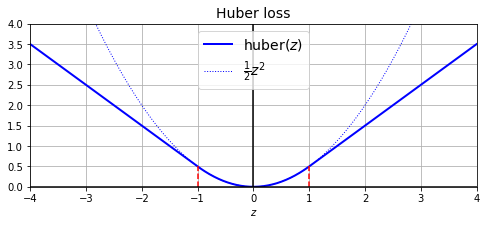

In [96]:

plt.figure(figsize = (8,3))
z = np.linspace(-4,4,200)
plt.plot(z,huber_fn(0,z),"b-",linewidth = 2, label = "huber($z$)")
plt.plot(z,z**2 /2,"b:",linewidth = 1,label = r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [5]:
input_shape =  x_train.shape[1:]
model = keras.models.Sequential([
    keras.layers.Dense(30,activation = "selu",kernel_initializer= "lecun_normal",input_shape = input_shape),
    keras.layers.Dense(1)
])

In [108]:
model.compile(loss = huber_fn,optimizer = "nadam",metrics = ["mae"])

In [111]:
model.fit(x_train_scaled,y_train,epochs = 2,validation_data = (x_valid_scaled,y_valid))

Epoch 1/2
363/363 [==============================] - 4s 6ms/step - loss: 1.0407 - mae: 1.4541 - val_loss: 0.2477 - val_mae: 0.5372
Epoch 2/2
363/363 [==============================] - 2s 5ms/step - loss: 0.2200 - mae: 0.5111 - val_loss: 0.2153 - val_mae: 0.4993


In [113]:
model.save("my_model_with_a_custom_loss.h5")

In [114]:
model= keras.models.load_model("my_model_with_a_custom_loss.h5",custom_objects = {"huber_fn":huber_fn})

In [116]:

model.fit(x_train_scaled, y_train, epochs=2,
          validation_data=(x_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 4ms/step - loss: 0.2033 - mae: 0.4893 - val_loss: 0.1971 - val_mae: 0.4786
Epoch 2/2
363/363 [==============================] - 2s 5ms/step - loss: 0.1991 - mae: 0.4839 - val_loss: 0.1887 - val_mae: 0.4684


In [6]:
def create_huber(threshold = 1.0):
    def huber_fn(y_pred,y_true):
        error = y_true-y_pred
        is_small_error = tf.abs(error)<1
        squared_error = error**2 / 2
        linear_error = tf.abs(error) - 0.5
        return tf.where(is_small_error,squared_error,linear_error)
    return huber_fn

In [118]:
model.compile(loss = create_huber(2.0),optimizer = "nadam",metrics = ["mae"])

In [119]:
model.fit(x_train_scaled, y_train, epochs=2,
          validation_data=(x_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 3s 3ms/step - loss: 0.1951 - mae: 0.4782 - val_loss: 0.1877 - val_mae: 0.4739
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.1960 - mae: 0.4789 - val_loss: 0.1822 - val_mae: 0.4600


In [120]:
model.save("my_model_with_a_custom_loss_threshold_2.h5")
                            

In [121]:
model = keras.models.load_model("my_model_with_a_custom_loss_threshold_2.h5",
                                custom_objects={"huber_fn": create_huber(2.0)})


In [123]:
model.fit(x_train_scaled, y_train, epochs=2,
          validation_data=(x_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 3ms/step - loss: 0.1887 - mae: 0.4691 - val_loss: 0.1814 - val_mae: 0.4557
Epoch 2/2
363/363 [==============================] - 2s 4ms/step - loss: 0.1866 - mae: 0.4655 - val_loss: 0.1785 - val_mae: 0.4540


In [7]:
class HuberLoss(keras.losses.Loss):
    def __init__(self,threshold =1.0,**kwargs):
        self.threshold=threshold
        super().__init__(**kwargs)
    def call(self,y_true,y_pred):
        error = y_true-y_pred
        is_small_error = tf.abs(error)<1
        squared_error = error**2 / 2
        linear_error = tf.abs(error) - 0.5
        return tf.where(is_small_error,squared_error,linear_error)
    def get_config(self):
        best_config = super().get_config() 
        return{**base_confg,"threshold":self.threshold}

In [8]:
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * (tf.abs(error) - self.threshold/ 2)
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [136]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])


In [138]:
model.compile(loss=HuberLoss(2.0),optimizer = "nadam",metrics = ["mae"])


In [139]:
model.fit(x_train_scaled, y_train, epochs=2,
          validation_data=(x_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 1.3077 - mae: 1.3651 - val_loss: 0.2542 - val_mae: 0.5183
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2453 - mae: 0.5162 - val_loss: 0.2389 - val_mae: 0.4895


In [140]:
model.save("my_model_with_a_custom_loss_class.h5")

In [ ]:
model = keras.models.load_model("my_model_with_a_custom_loss_class.h5",
                                custom_objects={"HuberLoss": HuberLoss})

In [143]:
model.fit(x_train_scaled, y_train, epochs=2,
          validation_data=(x_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2256 - mae: 0.4946 - val_loss: 0.2176 - val_mae: 0.4831
Epoch 2/2
363/363 [==============================] - 1s 1ms/step - loss: 0.2199 - mae: 0.4891 - val_loss: 0.2191 - val_mae: 0.4712


In [144]:

model.loss.threshold

2.0

## other custom functions

In [148]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
def my_softplus(z): # output is just tf.nn.softplus(z)
    return tf.math.log(1.0 + tf.exp(z))

def my_glorot_initializer(shape,dtype = tf.float32):
    stddev = tf.sqrt(2./ (shape[0]+shape[1]))
    return tf.random.normal( shape,stddev=stddev,dtype =dtype)

def my_l1_regularizer(weights):
    tf.reduce_sum(tf.abs(0.01*weights))
    
def my_positive_weights(weights): # return value is just tf.nn.relu(weights)
    return tf.where(weights<0,tf.zeros_like(weights),weights)

In [153]:
layer = keras.layers.Dense(1,activation = my_softplus,kernel_initializer = my_glorot_initializer,
                          kernel_regularizer = my_l1_regularizer,kernel_constraint = my_positive_weights)

In [154]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [158]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation = "selu",kernel_initializer = "lecun_normal",input_shape = input_shape),
    keras.layers.Dense(1,activation = my_softplus,kernel_initializer = my_glorot_initializer,
                       kernel_regularizer = my_l1_regularizer,
                       kernel_constraint= my_positive_weights)
    
])

In [159]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [160]:
model.fit(x_train_scaled, y_train, epochs=2,
          validation_data=(x_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 3ms/step - loss: 2.7810 - mae: 1.2421 - val_loss: inf - val_mae: inf
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.8145 - mae: 0.5830 - val_loss: inf - val_mae: inf


In [161]:
model.save("my_model_with_many_custom_parts.h5")

In [162]:
model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
       "my_l1_regularizer": my_l1_regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })

In [9]:
class MyL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self,factor):
        self.factor = factor
    def __call__(self,weights):
        return(tf.reduce_sum(tf.abs(self.factor*weights)))
    def get_config(self):
        return{"factor":self.factor}

In [181]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [182]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=MyL1Regularizer(0.01),
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [183]:

model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [184]:
model.fit(x_train_scaled, y_train, epochs=2,
          validation_data=(x_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 2.3829 - mae: 1.1635 - val_loss: 1.4154 - val_mae: 0.5607
Epoch 2/2
363/363 [==============================] - 1s 1ms/step - loss: 0.6299 - mae: 0.5410 - val_loss: 1.4399 - val_mae: 0.5137


In [169]:
model.save("my_model_with_many_custom_parts.h5")

In [170]:

model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
       "MyL1Regularizer": MyL1Regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })

## custom metrics

In [2]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [13]:
model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])

In [14]:

model.fit(x_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 [==============================] - 2s 2ms/step - loss: 3.7329 - huber_fn: 1.1256
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.5213 - huber_fn: 0.2210


In [16]:
model.compile(loss = create_huber(2.),optimizer = "nadam",metrics = [create_huber(2.)])

In [18]:
model.fit(x_train_scaled,y_train, epochs = 2)

Epoch 1/2
363/363 [==============================] - 2s 3ms/step - loss: 0.1960 - huber_fn: 0.1960
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.1917 - huber_fn: 0.1917


In [17]:
sample_weight = np.random.rand(len(y_train))
history = model.fit(x_train_scaled,y_train, epochs = 2,sample_weight = sample_weight)

Epoch 1/2
363/363 [==============================] - 2s 2ms/step - loss: 0.1048 - huber_fn: 0.2117
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.1032 - huber_fn: 0.2063


In [22]:
(history.history["loss"][0],history.history["huber_fn"][0]* sample_weight.mean())

(0.10048601031303406, 0.10135675647706509)

## streaming metrics

In [24]:
precision = keras.metrics.Precision()

In [26]:
precision([0,1,0,1,0,1],[1,0,0,1,0,0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [30]:
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])


<tf.Tensor: shape=(), dtype=float32, numpy=0.75>

In [31]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.75>

In [7]:
precision.variables

NameError: name 'precision' is not defined

In [33]:
precision.reset_states()

In [ ]:
#creating a streaming metric

In [10]:
class HuberMetric(keras.metrics.Metric):
  def __init__(self,threshold = 1.00,**kwargs):
        super().__init__(**kwargs)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        self.total = self.add_weight("total",initializer = "zeros")
        self.count = self.add_weight("count",initializer = "zeros")
  def update_state(self,y_true,y_pred,sample_weight= None):
            metric = self.huber_fn(y_true,y_pred)
            self.total.assign_add(tf.reduce_sum(metric))
            self.count.assign_add(tf.cast(tf.size(y_true),tf.float32))
  def result(self):
            return self.total/self.count
  def get_config(self):
            base_config = super().get_config()
            return{**base_config,"threshold":self.threshold}


In [23]:
m = HuberMetric(2.)
m(tf.constant([[2.]]), tf.constant([[10.]]))

<tf.Tensor: shape=(), dtype=float32, numpy=7.5>

In [24]:
m(tf.constant([[0.], [5.]]), tf.constant([[1.], [9.25]]))

m.result()

<tf.Tensor: shape=(), dtype=float32, numpy=3.9166667>

In [25]:
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=11.75>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=3.0>]

In [26]:

m.reset_states()
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=0.0>]

In [28]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [31]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation = "selu",kernel_initializer = "lecun_normal",input_shape = input_shape),
    keras.layers.Dense(1)
]) 

In [33]:
model.compile(loss = create_huber(2.0),optimizer = "nadam",metrics = [HuberMetric(2.0)])

In [34]:
x_train.dtype

dtype('float64')

In [37]:
model.fit(x_train_scaled,y_train,epochs = 2)

Epoch 1/2
363/363 [==============================] - 3s 3ms/step - loss: 1.0443 - huber_metric: 1.0443
Epoch 2/2
363/363 [==============================] - 1s 1ms/step - loss: 0.2379 - huber_metric: 0.2379


In [38]:

model.save("my_model_with_a_custom_metric.h5")

In [ ]:
model = keras.models.load_model("my_model_with_a_custom_metric.h5",
                                custom_objects={"huber_fn": create_huber(2.0),
                                                "HuberMetric": HuberMetric})

In [ ]:

model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

In [ ]:
model.metrics[-1].threshold


## custom layers

In [9]:
exponential_layer= keras.layers.Lambda( lambda x:tf.exp(x))

In [11]:
exponential_layer([-1., 0., 1.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.36787945, 1.        , 2.7182817 ], dtype=float32)>

In [ ]:
#Adding an exponential layer at the output of a regression model can be useful if the values 
#to predict are positive and with very different scales (e.g., 0.001, 10., 10000):



In [12]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [22]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation ="relu",input_shape = input_shape),
    keras.layers.Dense(1),
    exponential_layer
])
model.compile(loss="mse", optimizer="sgd")
model.fit(x_train_scaled, y_train, epochs=5,
          validation_data=(x_valid_scaled, y_valid))
model.evaluate(x_test_scaled, y_test)

Epoch 1/5
363/363 [==============================] - 2s 3ms/step - loss: 0.9423 - val_loss: 0.4108
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4432 - val_loss: 0.3585
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4199 - val_loss: 0.3443
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 0.4246 - val_loss: 2105722496.0000
Epoch 5/5
162/162 [==============================] - 0s 1ms/step - loss: 0.4307


0.43073734641075134

In [11]:
class MyDense(keras.layers.Layer):
    def __init__(self,units,activation,**kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activations = keras.activations.get(activation)
    def build(self,batch_input_shape):
        self.kernel = self.add_weight(name = "kernel",shape = [batch_input_shape[-1],self.units] , initializer = "glorot_normal")
        self.bias = self.add_weight(name = "bias",shape = [self.units],initializer = "zeros")
        super().build(batch_input_shape)
    def call(self,x):
        return self.activation(x@self.kernel + self.bias)
    def compute_output_shape(self,batch_input_shape):
        return tf.TensorShape(batch_input_shape.as_list()[:-1]+[self.units])
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units": self.units,
                "activation": keras.activations.serialize(self.activation)}
    
        

In [12]:
#to crete  layer with multiple inputs and outputs
class MyMultiLayer(keras.layers.Layer):
    def calll(self,x):
        x1,x2 =x
        return [x1+x2,x1*x2,x1/x2]
    def compurte_output_shape(elf,batch_input_shape):
        b1,b2 = batch_input_shape
        return [b1,b1,b1]

In [ ]:
#if layer needs to have different behaviour during training and testing,
#eg.like batch normalization or dropout
class MyGaussianNoise(keras.layers.Layer):
    def __init__(self,stddev,**kwargs):
        self.stddev= stddev
    def call(self,x ,training  = None):
        if training:
             noise = tf.random.normal(tf.shape(x),stddev = self,stddev)
        return x+ noise
        else:
            return x
        def compute_output_shape(self,batch_input_shape):
            return batch_input_shape
        

## custom models

In [29]:
class ResidualBlock(keras.layers.Layer):
    def __init__(self,n_layers,n_neurons,**kwargs):
        super().__init__(**kwargs)
        self.hidden =  [keras.layers.Dense(n_neurons,activation = "elu",kernel_initializer = "he_normal")
                        for _ in range(n_layers)]
    def call(self,inputs):
        z = inputs
        for layer in self.hidden:
            z = layer(z)
        return inputs +z
            

In [30]:
class ResidualRegressor(keras.Model):
    def __init__(self,output_dim,**kwargs):
        super().__init__(**kwargs)
        self.hidden1= keras.layers.Dense(30, activation = "elu",kernel_initializer = "he_normal")
        self.block1 = ResidualBlock(2,30)
        self.block2 = ResidualBlock(2,30)
        self.out= keras.layers.Dense(output_dim)
    def call(self,inputs):
        z = self.hidden1(inputs)
        for _ in range(1+3):
            z = self.hidden1(inputs)
        z = self.block2(z)
        return self.out(z)
            
                
                
        
        

In [33]:
model = ResidualRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(x_train_scaled, y_train, epochs=5)
score = model.evaluate(x_test_scaled, y_test)
y_pred = model.predict(x_test_scaled)

Epoch 1/5
363/363 [==============================] - 3s 2ms/step - loss: 2.3580
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 0.5573
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4009
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4664
Epoch 5/5
162/162 [==============================] - 0s 1ms/step - loss: 0.4696


In [34]:
model.save("my_custom_model.ckpt")

INFO:tensorflow:Assets written to: my_custom_model.ckpt\assets


INFO:tensorflow:Assets written to: my_custom_model.ckpt\assets


In [35]:
model = keras.models.load_model("my_custom_model.ckpt")

In [36]:
history = model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
363/363 [==============================] - 3s 2ms/step - loss: 0.3890
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4829
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 0.3517
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4117
Epoch 5/5
363/363 [==============================] - 1s 2ms/step - loss: 0.3771


In [37]:
block1 = ResidualBlock(2, 30)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal"),
    block1, block1, block1, block1,
    ResidualBlock(2, 30),
    keras.layers.Dense(1)
])

In [38]:
model.compile(loss="mse", optimizer="nadam")
history = model.fit(x_train_scaled, y_train, epochs=5)
score = model.evaluate(x_test_scaled, y_test)
y_pred = model.predict(x_test_scaled)

Epoch 1/5
363/363 [==============================] - 3s 2ms/step - loss: 5.5612
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 0.6062
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4161
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 2.0225
Epoch 5/5
162/162 [==============================] - 0s 2ms/step - loss: 0.3988


## loss and metrics based on model internals 

In [24]:
class ReconstructingRegressor(keras.models.Model):
    def __init__(self,output_dim,**kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(30,activation ="selu",kernel_initializer ="lecun_normal") for _ in range(5)]
        self.out =keras.layers.Dense(output_dim)
        self.reconstruct = keras.layers.Dense(8)
        self.reconstruction_mean = keras.metrics.Mean(name = "reconstruction_error")
    def call(self,inputs,training = None):
        z = inputs 
        for layer in self.hidden:
            z = layer(z)
        reconstruction = self.reconstruct(z)
        recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
        self.add_loss(0.05*recon_loss)
        if training :
            result = self.reconstruction_mean(recon_loss)
            self.add_metric(result)
        return self.out(z)
            
            
        
        

In [25]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [26]:
model = ReconstructingRegressor(1)
model.compile(loss = "mse", optimizer = "nadam")
history = model.fit(x_train_scaled,y_train,epochs = 2)
y_pred = model.predict(x_test_scaled)

Epoch 1/2
363/363 [==============================] - 6s 3ms/step - loss: 1.6313 - reconstruction_error: 1.0474
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.4536 - reconstruction_error: 0.4022


## computing gradients with autodiff

In [27]:
def f(w1,w2):
    return 3* w1 **2 +2*w1*w2

In [30]:
w1,w2 = 5,3
eps = 1e-6
(f(w1 + eps,w2) - f(w1,w2))/eps

36.000003007075065

In [32]:
(f(w1 ,w2+eps) - f(w1,w2))/eps

10.000000003174137

In [33]:
w1,w2 = tf.Variable(5.),tf.Variable(3.)
with tf.GradientTape() as tape:
    z= f(w1,w2)
gradients = tape.gradient(z,[w1,w2])

In [34]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [40]:
with tf.GradientTape() as tape:
    z = f(w1,w2)
dz_dw1 = tape.gradient(z,w1)
try:
    dz_dw2 = tape.gradient(z,w2)
except RuntimeError as ex:
    print(ex)
#the tape is automatically erased after you called its gradient() once to preven tit put prsistent = True
# to save memory pause recording by creating a with tape.stop_recording() block inside the tf.gradienttape()block   

A non-persistent GradientTape can only be used tocompute one set of gradients (or jacobians)


In [42]:
with tf.GradientTape(persistent = True) as tape:
    z = f(w1,w2)
dz_dw1 = tape.gradient(z,w1)
dz_dw2 = tape.gradient(z,w2)
del tape

In [43]:
dz_dw1,dz_dw2

(<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>)

In [44]:
c1, c2 = tf.constant(5.), tf.constant(3.)
with tf.GradientTape() as tape:
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])

In [45]:

gradients

[None, None]

In [46]:
with tf.GradientTape() as tape:
    tape.watch(c1)
    tape.watch(c2)
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])

In [47]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [54]:

with tf.GradientTape() as tape:
    z1 = f(w1, w2 + 2.)
    z2 = f(w1, w2 + 5.)
    z3 = f(w1, w2 + 7.)

tape.gradient([z1, z2, z3], [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=136.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=30.0>]

In [56]:
with tf.GradientTape(persistent = True) as tape:
    z1 = f(w1, w2 + 2.)
    z2 = f(w1, w2 + 5.)
    z3 = f(w1, w2 + 7.)
tf.reduce_sum(tf.stack([tape.gradient(z,[w1,w2]) for z in (z1,z2,z3)]),axis= 0)
del tape 

In [60]:
with tf.GradientTape(persistent = True) as hessian_tape:
    with tf.GradientTape() as jacobian_tape:
        z = f(w1,w2)
    jacobians = jacobian_tape.gradient(z,[w1,w2])
hessians = [hessian_tape.gradient(j,[w1,w2]) for j in jacobians]  
del hessian_tape

In [61]:
jacobians

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [63]:
hessians

[[<tf.Tensor: shape=(), dtype=float32, numpy=6.0>,
  <tf.Tensor: shape=(), dtype=float32, numpy=2.0>],
 [<tf.Tensor: shape=(), dtype=float32, numpy=2.0>, None]]

In [64]:
def f(w1,w2):
    return 3 * w1 ** 2 + tf.stop_gradient(2*w1*w2)
with tf.GradientTape() as tape:
    z = f(w1, w2)
tape.gradient(z, [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=30.0>, None]

In [66]:
x = tf.Variable(100.)
with tf.GradientTape() as tape:
    z = my_softplus(x)

tape.gradient(z, [x])
# this is because computing the gradients of this function using autodiff leads to some numerical difficulties
#,due to floating point precison error auto idff end up computing infinity divided by infinity (which returns infinity)

[<tf.Tensor: shape=(), dtype=float32, numpy=nan>]

In [67]:
tf.math.log(tf.exp(tf.constant(30.,dtype =tf.float32))+1.)

<tf.Tensor: shape=(), dtype=float32, numpy=30.0>

In [68]:
x = tf.Variable([100.])
with tf.GradientTape() as tape:
    z = my_softplus(x)

tape.gradient(z, [x])

[<tf.Tensor: shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>]

In [71]:
@tf.custom_gradient
def my_better_softplus(z):
    exp = tf.exp(z)
    def my_softplus_gradients(grad):
        return grad/(1+1/exp)
    return tf.math.log(exp + 1), my_softplus_gradients
    
def my_better_softplus(z):
    return tf.where(z > 30., z, tf.math.log(tf.exp(z) + 1.))

In [72]:
x = tf.Variable([1000.])
with tf.GradientTape() as tape:
    z = my_better_softplus(x)

z, tape.gradient(z, [x])

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1000.], dtype=float32)>,
 [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>])

## computing gradients using autodiff

In [13]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


In [21]:
l2_reg = keras.regularizers.l2(0.05)
model = keras.models.Sequential([
    keras.layers.Dense(30,activation = "elu",kernel_initializer = "he_normal", kernel_regularizer = l2_reg),
    keras.layers.Dense(1,kernel_regularizer = l2_reg)
])

In [22]:
def random_batch(x,y ,batch_size = 32):
    idx = np.random.randint(len(x),size = batch_size)
    return x[idx],y[idx]

In [31]:
def print_status_bar(iteration,total,loss,metrics = None):
    metrics =" - ".join(["{}:{:.4f}".format(m.name,m.result()) for m in [loss] + (metrics or [])])
    end = " " if iteration< total else "\n"
    print("\r{}/{}- ".format(iteration, total)+ metrics, end = end)

In [32]:
import time
mean_loss = keras.metrics.Mean(name = "loss")
mean_square = keras.metrics.Mean(name = "mean_square")
for i in range(1,50 +1):
    loss = 1/i
    mean_loss(loss)
    mean_square(i** 2)
    print_status_bar(i, 50,mean_loss,[mean_square])
    time.sleep(0.05)

50/50- loss:0.0900 - mean_square:858.5000 


In [ ]:
# skipped few codes because did mnot understand , have to clarify


In [35]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [37]:
n_epochs = 5
batch_size = 42
n_steps = len(x_train)// batch_size
optimizer = keras.optimizers.Nadam(lr = 0.01)
loss_fn = keras.losses.mean_squared_error
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.MeanAbsoluteError()]



In [48]:
for epoch in range(1,n_epochs+1):
    print("Epoch {}/{}".format(epoch,n_epochs))
    for step in range(1,n_steps +1):
        x_batch, y_batch = random_batch(x_train_scaled,y_train)
        with tf.GradientTape() as tape:
            y_pred = model(x_batch,training = True)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss]+model.losses)
        gradients = tape.gradient(loss,model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        mean_loss(loss)
        for metric in metrics:
            metric(y_batch,y_pred)
        print_status_bar(step* batch_size,len(y_train),mean_loss,metrics)
    print_status_bar(len(y_train),len(y_train), mean_loss,metrics)
    for metric in [mean_loss] + metrics:
        metric.reset_states()

Epoch 1/5
11610/11610- mean:1.4757 - mean_absolute_error:0.5811 
Epoch 2/5
11610/11610- mean:0.6645 - mean_absolute_error:0.5199 
Epoch 3/5
11610/11610- mean:0.6648 - mean_absolute_error:0.5342 
Epoch 4/5
11610/11610- mean:0.6174 - mean_absolute_error:0.5114 
Epoch 5/5
11610/11610- mean:0.6482 - mean_absolute_error:0.5244 


## exercises

In [49]:
# implment a custom layer that performs layer normlizations

In [52]:
class LayerNormalization(keras.layers.Layer):
    def __init__(self,eps = 0.001,**kwargs):
        super().__init(**kwargs)
        self.eps = eps
    def  build(self, batch_input_shape):
        self.alpha = self.add_weight(name ="alpha",shape = batch_inout_shape[-1:],initializers= "ones")
        self.alpha = self.add_weight(name ="beta",shape = batch_inout_shape[-1:],initializers= "zeros")
        super().build(batch_input_shape)
    def call(self,x):
        mean,variance = tf.nn.moments(x,axes = -1, keepdims = True)
        return self.alpha *(x-mean)/(tf.sqrt(variance + self.eps)) + self.beta
    def compute_output_shape(self,batch_input_shape):
        return batch_input_shape

    def get_config(self):
        base_config = super().get_config()
        return{**base_config,"eps":self.eps}

In [ ]:
x = x_train.astype(np.float32)
custom_layer_norm = LayerNormalization()
keras_layer_norm = keras.layers.LayerNormalization()
tf.reduce_mean(keras.losses.mean_absolute_error(keras_layer_norm(x),custom_layer_norm(x)))